In [1]:
import pandas as pd
import numpy as np
import re
#import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter # extract a slice of an iterator — similar to list slicing, but it works on any iterable (even infinite ones or generators).
from itertools import islice # count/freq of strings

In [2]:
from datasets import load_dataset
dataset = load_dataset("ai4bharat/IndicCorpV2",split = "mar_Deva" , streaming = True)
display(dataset)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

IterableDataset({
    features: Unknown,
    num_shards: 1
})

In [3]:
#sample values
for i, example in enumerate(islice(dataset, 5)):
    print(f"{example['text']}")

ऊती संवर्धन तंत्राचे अनेक उपयोग आहेत. या तंत्राचा उपयोग विशेषकरून जीवशास्त्र व वैद्यकशास्त्रात होतो. वयोवृद्धी, पोषण, लसनिर्मिती, जन्मजात रोगांचे निदान, इंद्रियांचे रोपण, कर्करोग संशोधन व गर्भपोषण या क्षेत्रांत ऊती संवर्धन तंत्र प्रामुख्याने वापरले जाते. पेशींच्या चयापचयावर एखाद्या घटकाचा परिणाम पाहणे, सामान्य किंवा कर्करोगाच्या पेशींवर औषधांचा होणारा परिणाम पाहणे, प्रयोगशाळेत त्वचा तयार करणे इ. बाबी ऊती संवर्धनामुळे शक्य झाल्या आहेत. भाजलेल्या रुग्णाच्या त्वचारोपणासाठी ऊती संवर्धनाद्वारे निर्माण केलेली त्वचा वापरली जाते.

शहरातील माध्यमिक विभागाच्या शाळा ३ जानेवारीपर्यंत विद्यार्थ्यांसाठी बंद ठेवण्यात येणार आहेत. मात्र, शिक्षकांना शा‌ळेत जाणे अनिवार्य केले आहे. त्यामुळे शिक्षक, शिक्षकेतर कर्मचाऱ्यांना कोरोना तपासणी सक्तीची केली आहे. सोमवारी ५९८ शिक्षकांची तपासणी करण्यात आली. रविवारी २९८ शिक्षकांची तपासणी झाली होती. त्यामध्ये १८ जणांना कोरोनाची बाधा झाल्याचे आढळले.  आतापर्यंत शंभरपेक्षा अधिक शिक्षक, शिक्षकेतर कर्मचारी पॉझिटिव्ह आढळले आहेत.

राणे यांनी शिवसेनेच्या मंत्र्यावर केलेल्या आर

In [4]:
# Sentence tokenizer
def sentence_tokenizer(text):
    return re.split(r'(?<=[।!?|])\s+', text.strip())
#  ?<=  Lookbehind means: “Match something only if it is immediately preceded by a certain pattern.”
# strip - remove all the space in start , end of sentence
# r' ' - raw string
# Word tokenizer
def word_tokenizer(sentence):
    pattern = r'''(?x)                       #(?x) - tells python re to ignore space , comment in this string
        (https?://[^\s]+)                    # URLs  #:// takes the literal character //
      | (\w+@\w+\.\w+)                       # Emails
      | (\d{1,2}[-/]\d{1,2}[-/]\d{2,4})      # Dates
      | (\d+\.\d+)                           # Decimals
      | (\d+)                                # Whole numbers
      | ([\u0900-\u097F]+)                   # Devanagari (Marathi/Hindi) words
      | ([a-zA-Z]+)                          # English words
      | ([।.,!?;:"'\-—()])                   # Punctuation
    '''
    tokens = re.findall(pattern, sentence)
    #When used with re.findall, each token will go into a separate group.
    # Flatten the list of tuples into a single list
    return [t for group in tokens for t in group if t]


In [ ]:
# this is not used (only for understanding)
# Word tokenizer
#def word_tokenizer(sentence):
    pattern = r'''(?x)
        (?:https?://[^\s]+)                   # URLs
        | (?:\w+@\w+\.\w+)                    # Emails
        | (?:\d{1,2}[-/]\d{1,2}[-/]\d{2,4})   # Dates
        | (?:\d+\.\d+)                        # Decimals
        | (?:\d+)                             # Whole numbers
        | (?:\w+|[^\w\s])                     # Words and punctuation
    '''
    return re.findall(pattern, sentence)
# does not properly tokenize Marathi words (Devanagari script) unless you use Unicode-aware regex.
#Python's \w does not include Devanagari characters by default.
# This is incorrect, as it's splitting valid Marathi words into letters and matras

In [5]:
sentence = sentence_tokenizer('मजकुराचा पैलू  मागील कॅमेरा ?, ड्युअल टोन!! एल. ई. डी. फ्लॅश आणि फिंगरप्रिंट स्कॅनरची सेटअप वैशिष्ट्ये रेडमी नोट 3 सारखीच आहेत|')
print(sentence)
#Split the text wherever there is a space following a sentence-ending punctuation mark (।, !, ?, or |)

['मजकुराचा पैलू  मागील कॅमेरा ?, ड्युअल टोन!!', 'एल. ई. डी. फ्लॅश आणि फिंगरप्रिंट स्कॅनरची सेटअप वैशिष्ट्ये रेडमी नोट 3 सारखीच आहेत|']


In [6]:
#using the unicode- aware tokenizer
words = word_tokenizer(sentence[-1])
print(words)

['एल', '.', 'ई', '.', 'डी', '.', 'फ्लॅश', 'आणि', 'फिंगरप्रिंट', 'स्कॅनरची', 'सेटअप', 'वैशिष्ट्ये', 'रेडमी', 'नोट', '3', 'सारखीच', 'आहेत']


In [7]:
words = word_tokenizer("राम पुण्याला गेला। He met Sita on 12-08-2025! Visit http://abc.com")
print(words)

['राम', 'पुण्याला', 'गेला।', 'He', 'met', 'Sita', 'on', '12-08-2025', '!', 'Visit', 'http://abc.com']


In [8]:
max_examples = 100000
tokenized_sentences = []
total_words = 0
total_chars = 0
unique_tokens = set()
# Safely iterate over streaming dataset with limit
for example in islice(dataset, max_examples): # word, freq
    text = example["text"]
    sentences = sentence_tokenizer(text)
    for sentence in sentences:
        tokens = word_tokenizer(sentence)
        if tokens:
            tokenized_sentence = " ".join(tokens)
            tokenized_sentences.append(tokenized_sentence)
            total_words += len(tokens)
            total_chars += sum(len(t) for t in tokens)
            unique_tokens.update(tokens)

# Step 4: Save to file
df = pd.DataFrame({'sentence': tokenized_sentences})
df.to_csv("marathi_tokenized_sentences.csv", index=False, encoding="utf-8")
# Corpus statistics
num_sentences = len(tokenized_sentences)
avg_sentence_length = total_words / num_sentences
avg_word_length = total_chars / total_words
ttr = len(unique_tokens) / total_words
#High TTR → greater vocabulary variety
#Low TTR → more repetition, less variety
token_count = len(unique_tokens)
print("Corpus Statistics:")
print(f"Total number of sentences: {num_sentences}")
print(f"Total number of words: {total_words}")
print(f"Unique_tokens:{token_count}")
print(f"Total number of characters: {total_chars}")
print(f"Average sentence length: {avg_sentence_length:.2f}")
print(f"Average word length: {avg_word_length:.2f}")
print(f"Type/Token Ratio (TTR): {ttr:.4f}")

Corpus Statistics:
Total number of sentences: 54791
Total number of words: 2386442
Unique_tokens:204170
Total number of characters: 12213042
Average sentence length: 43.56
Average word length: 5.12
Type/Token Ratio (TTR): 0.0856


In [9]:
df.shape

(54791, 1)

In [10]:
df1 = pd.read_csv("marathi_tokenized_sentences.csv")
df1.head()

,sentence
0,ऊती संवर्धन तंत्राचे अनेक उपयोग आहेत . या तंत्...
1,शहरातील माध्यमिक विभागाच्या शाळा ३ जानेवारीपर्...
2,राणे यांनी शिवसेनेच्या मंत्र्यावर केलेल्या आरो...
3,त्यामुळे शिरूर तालुक् यात आतापर्यंत आढळलेल्या ...
4,प्रत्येक हॅास्पीटलला २५ ते ३० टक्के ॲाक्सीजनचा...


 ✅ For CSV files opened in Excel:
When opening in Excel:

Don't double-click to open!

Instead:

Open Excel.

Go to File > Open > Browse.

In the Open dialog, select "All Files" and choose your CSV.

You'll get a Text Import Wizard:

Select "65001: Unicode (UTF-8)" as the encoding.

Use comma (,) as delimiter.

Finish.

This will render Marathi text correctly.

In [11]:
#!pip install pyarrow
# Assuming df is your DataFrame with tokenized sentences
df.to_parquet("marathi_tokenized_sentences.parquet", engine='pyarrow', compression='snappy', index=False)


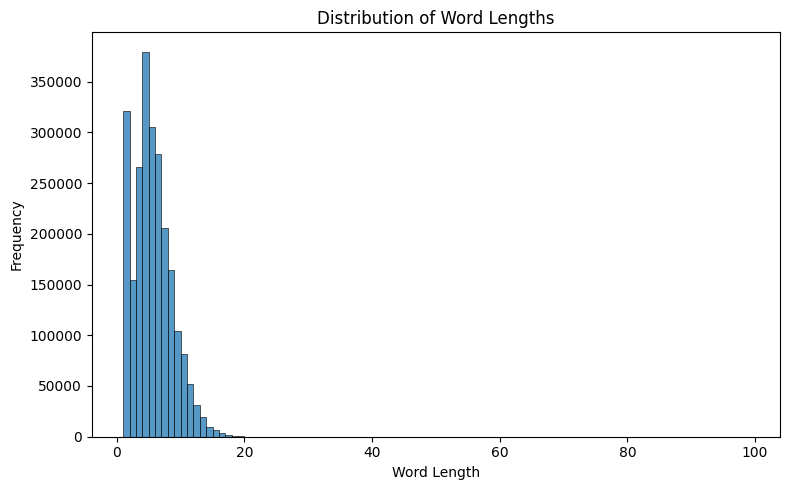

In [12]:
word_lengths = [len(word) for sentence in tokenized_sentences for word in sentence.split()]
sentence_lengths = [len(sentence.split()) for sentence in tokenized_sentences]
all_words = [word for sentence in tokenized_sentences for word in sentence.split()]
word_freq = Counter(all_words).most_common(20)
# Plot 1: Word Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(word_lengths, bins=range(1, max(word_lengths) + 1), kde=False)
plt.title("Distribution of Word Lengths")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

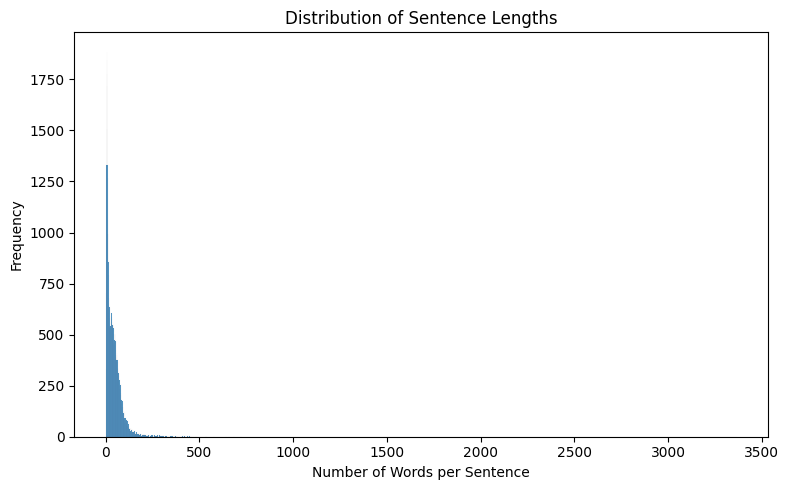

In [13]:
# Plot 2: Sentence Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sentence_lengths, bins=range(1, max(sentence_lengths) + 1), kde=False)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words per Sentence")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()